In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 生成随机数据

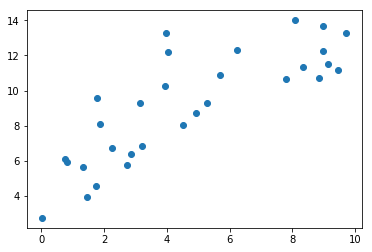

In [36]:
# generate synthetic data
m = 30  # number of sample data
x_max = 10  # max value of x
x = np.random.random_sample(m) * x_max
noise = np.random.randint(0, x_max, m) * np.random.random_sample(m)
y = 0.2*x + np.sqrt(x) * 3 + noise
y = y.reshape(m,1)
plt.scatter(x, y)
# print(x, y)

## 1 一元线性回归

### 1.1 使用Sklearn训练一元线性回归模型

[[0.82437823]] [5.26751374]


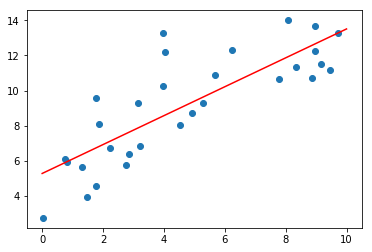

In [37]:
# train model with sklearn
linear_model = LinearRegression()
# vectorize x and y
X = x.reshape(m, 1)
# print(X,y)
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)
# visualize fit line
plt.scatter(x, y)
xx = np.array([0,x_max])
yy_sk = linear_model.coef_[0] * xx + linear_model.intercept_
plt.plot(xx, yy_sk, label='Linear regression with sklearn', c='r')

### 1.2 使用正规方程求得一元线性回归的解析解

In [38]:
from numpy.linalg import inv
def normalEquation(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

In [39]:
# transform X and y to fit our model
X_m_2 = np.c_[np.ones(m), x]  # theta[0]的系数为1
y_m_1 = np.c_[y]

In [40]:
theta_norm = normalEquation(X_m_2, y)
print(theta_norm)

[[5.26751374]
 [0.82437823]]


### 1.3 使用梯度下降法训练一元线性回归模型

In [41]:
def computeCost(X, y, theta):
    hypothesis = X.dot(theta)
    residual = hypothesis - y
    J = 1/2/m * residual.T.dot(residual)
    return J

In [42]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # save all cost values over iterations
    J_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))
    for iter in range(num_iters):
        hypothesis = X.dot(theta)
        theta -= alpha / m * ( X.T.dot(hypothesis - y) )  # core step of gradient descent
        J_history[iter] = computeCost(X, y, theta)
        theta_history[iter,:] = theta.reshape(1,2)
    return (theta, J_history, theta_history)

In [43]:
# config learing parameters
theta_0 = [[0],[0]]  # initial theta
alpha = 0.01  # learning rate
num_iters = 1000
# train our own model
theta_gd, J_history, theta_history = gradientDescent(X_m_2, y_m_1, theta_0, alpha, num_iters)
print(theta_gd)

[[4.98202846]
 [0.86743258]]


Text(0.5,0,'iteration number')

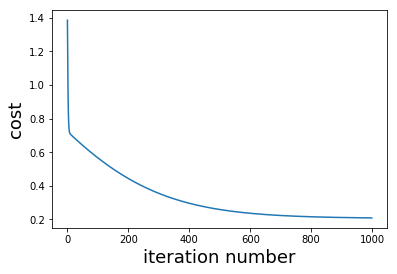

In [44]:
# visualization of cost history
# plt.ylim([2.2, 5])
# plt.plot(J_history)
plt.plot(np.log10(J_history))
plt.ylabel('cost', fontsize=18)
plt.xlabel('iteration number', fontsize=18)

### 1.4 对比三种训练方式的结果

#### 1.4.1 可视化对比

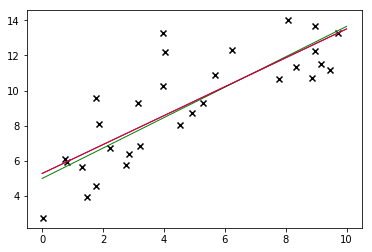

In [45]:
# visualization of results plot
yy_gd = theta_gd[0] + theta_gd[1] * xx
yy_norm = theta_norm[0] + theta_norm[1] * xx
plt.scatter(x, y, marker='x', c='k')

plt.plot(xx, yy_gd, c='g', label='gradient descent', linewidth=1)
plt.plot(xx, yy_sk, c='b', label='sklearn', linewidth=1)
plt.plot(xx, yy_norm, c='r', label='normal equation', linewidth=1)


#### 1.4.2 对比代价函数的计算结果

In [46]:
print(computeCost(X_m_2, y_m_1, theta_gd))
print(computeCost(X_m_2, y_m_1, theta_norm.reshape(2,1)))
print(computeCost(X_m_2, y_m_1, [linear_model.intercept_, linear_model.coef_]))

[[1.61788617]]
[[1.605947]]
[[1.605947]]


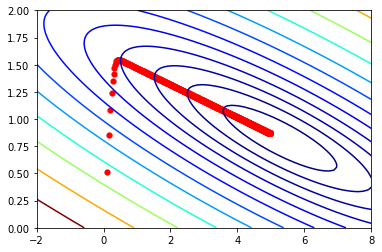

In [79]:
# visualize cost as contour
# Create grid coordinates for plotting
B0 = np.linspace(-2, 8, 80)
B1 = np.linspace(0, 2, 80)
xx_mesh, yy_mesh = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X_m_2, y, theta=[[xx_mesh[i,j]], [yy_mesh[i,j]]])

# Left plot
plt.contour(xx_mesh, yy_mesh, Z, np.logspace(-2, 3, 40), cmap=plt.cm.jet)
plt.scatter(theta_history[: ,0],theta_history[:, 1], c='r', linewidths=0.2)

### 由于一元线性回归无法很好地拟合，使用多项式回归

## 2. 多项式回归

### 2.1 Sklearn训练多项式回归模型

In [48]:
# polynomial regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

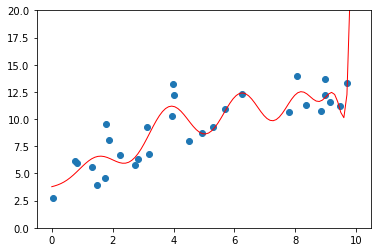

In [75]:
# sklearn method
degree = 16
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
# print(model.named_steps.ridge.coef_[0,1:3])
ridge_model = model.named_steps['ridge']
# print(model.named_steps)
theta_3_1_sk = np.c_[ridge_model.intercept_, ridge_model.coef_[:,1:degree+1]].reshape(degree+1, 1)

X_plot = np.linspace(0, 10, 100)[:, np.newaxis]
plt.scatter(x, y)
y_plot_poly_sk = model.predict(X_plot)
plt.ylim([0,20])
plt.plot(x_plot, y_plot_poly_sk, c='r', linewidth=1,label="degree %d" % degree)

### 2.2 正规方程求得多项式回归模型的解析解

In [ ]:
# normal equation method
x_square = x * x
X_m_3 = np.c_[X_m_2, x_square.reshape(m,1)]
theta_3_1_norm = normalEquation(X_m_3, y.reshape(m,1))
print(theta_3_1_norm)

### 2.3 梯度下降法训练多项式回归模型

In [ ]:
# gradient descent method
# assume 2nd degree
theta_3_1_init = [[2], [1], [0]]
alpha_poly = 0.0001
num_iter_poly = 200000
theta_3_1_gd, J_history_poly = gradientDescent(X_m_3, y, theta_3_1_init, alpha_poly, num_iter_poly)
print(theta_3_1_gd)

# visualization of cost history
# plt.ylim([0, 10])  # zoom in to check gradient descent rate
plt.plot(J_history_poly)
plt.ylabel('cost')
plt.xlabel('iteration number')


### 2.4 可视化对比三种训练方式的结果

In [ ]:
plt.scatter(x, y, marker='x', c='k')
linewidth = 2
y_plot_poly_norm = theta_3_1_norm[0] + theta_3_1_norm[1]*x_plot + theta_3_1_norm[2]*(x_plot*x_plot)
y_plot_poly_gd = theta_3_1_gd[0] + theta_3_1_gd[1]*x_plot + theta_3_1_gd[2]*(x_plot*x_plot)
plt.plot(x_plot, y_plot_poly_norm, c='b', linewidth=linewidth,label="normal equation")
plt.plot(x_plot, y_plot_poly_sk, c='g', linewidth=linewidth,label="sklearn")
plt.plot(x_plot, y_plot_poly_gd, c='r', linewidth=linewidth,label="gradient descent")

#### 对比代价函数

In [ ]:
print(computeCost(X_m_3, y.reshape(m,1), theta_3_1_norm))
print(computeCost(X_m_3, y.reshape(m,1), theta_3_1_sk))
print(computeCost(X_m_3, y.reshape(m,1), theta_3_1_gd))

#### 多变量线性回归的实现方式与多项式回归非常相似，只需更换X的数据即可，这里不再演示